In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# load in output file from GuideScan
guidescan_output = pd.read_csv('/iblm/netapp/home/karthik/GuideScan/Gasperini2019/guidescan_output.csv')
guidescan_output['guide_spacer'] = guidescan_output['gRNA'].apply(lambda x: x[:-3])
guidescan_output.head()

,Index,gRNA,Chromosome,Start,End,Strand,Num Off-Targets,Off-Target Summary,Specificity,Cutting-Efficiency,guide_spacer
0,0,CAGAGGCGGCAGCACCACCGNGG,chr11,64241085.0,64241107.0,+,37.0,2:2 | 3:35,0.185929,0.680272,CAGAGGCGGCAGCACCACCG
1,1,CCCGTGGGAGTTGTAGTGTGNGG,chr8,140511377.0,140511399.0,-,14.0,2:0 | 3:14,0.407114,0.661546,CCCGTGGGAGTTGTAGTGTG
2,2,CCCTTGCCTGGGAATGAGGGNGG,chr1,26696085.0,26696107.0,-,79.0,2:3 | 3:76,0.078343,0.579524,CCCTTGCCTGGGAATGAGGG
3,3,CCGCGGGAAGGAGGACGGCGNGG,chr1,2391895.0,2391917.0,-,55.0,2:0 | 3:55,0.161663,0.446905,CCGCGGGAAGGAGGACGGCG
4,4,CCGGCCCGACCCCGGCCATGNGG,chr11,72103219.0,72103241.0,-,23.0,2:0 | 3:23,0.267725,0.522548,CCGGCCCGACCCCGGCCATG


In [9]:
# load in gRNA groups with spacer sequences
guide_sequences = pd.read_csv('/iblm/netapp/data1/external/Gasperini2019/suppl/GSE120861_grna_groups.at_scale.txt',
                              sep = '\t',
                              names = ['guide_group', 'guide_spacer'])
guide_sequences.head()

,guide_group,guide_spacer
0,SH3BGRL3_TSS,AAACCGCTCCCGAGCACGGG
1,MTRNR2L8_TSS,AAATAGTGGGAAGATTCGTG
2,FAM83A_TSS,AACACACCACGGAGGAGTGG
3,ZNF593_TSS,AACAGCCCGGCCGGCCAAGG
4,ATPIF1_TSS,AACGAGAGACTGCTTGCTGG


In [10]:
# merge data frames together on spacer sequence
guide_sequences = guide_sequences.merge(guidescan_output, on = 'guide_spacer')
guide_sequences.head()

,guide_group,guide_spacer,Index,gRNA,Chromosome,Start,End,Strand,Num Off-Targets,Off-Target Summary,Specificity,Cutting-Efficiency
0,SH3BGRL3_TSS,AAACCGCTCCCGAGCACGGG,0,AAACCGCTCCCGAGCACGGGNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MTRNR2L8_TSS,AAATAGTGGGAAGATTCGTG,1,AAATAGTGGGAAGATTCGTGNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FAM83A_TSS,AACACACCACGGAGGAGTGG,2,AACACACCACGGAGGAGTGGNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ZNF593_TSS,AACAGCCCGGCCGGCCAAGG,3,AACAGCCCGGCCGGCCAAGGNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ATPIF1_TSS,AACGAGAGACTGCTTGCTGG,4,AACGAGAGACTGCTTGCTGGNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# count the number of guides that do not have an efficiency
unmatched_guides = guide_sequences[guide_sequences['Start'].isna()]
unmatched_guides.shape

(2253, 12)

/tmp/ipykernel_1032/558920184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unmatched_guides['Chromosome'] = unmatched_guides['Chromosome'].replace({'No match found for input sequence.': 'No match', 'Guide not found in Guidescan2 database. This is because it has multiple off-targets at distance 1.': 'Multiple off-targets', 'Multiple perfect matches found. Cannot resolve sequence to unique coordinates.': 'Multiple matches'})


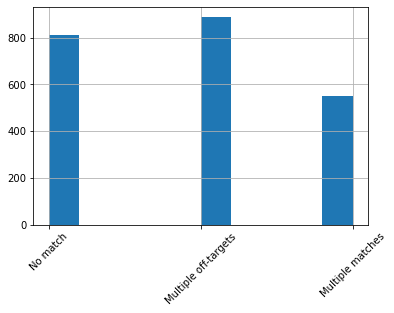

In [28]:
# plot the distribution of GuideScan failure reasons
unmatched_guides['Chromosome'] = unmatched_guides['Chromosome'].replace({'No match found for input sequence.': 'No match', 'Guide not found in Guidescan2 database. This is because it has multiple off-targets at distance 1.': 'Multiple off-targets', 'Multiple perfect matches found. Cannot resolve sequence to unique coordinates.': 'Multiple matches'})
ax = plt.gca()
plt.xticks(rotation=45)
unmatched_guides['Chromosome'].hist();